In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np

# Load the SpaceX dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Display the first 10 rows of the dataframe
print(df.head(10))

# Identify and calculate the percentage of the missing values in each attribute
missing_values_percentage = df.isnull().sum() / len(df) * 100
print(missing_values_percentage)

# Identify which columns are numerical and categorical
print(df.dtypes)
# Descriptive statistics


df.describe()

# TASK 1: Calculate the number of launches on each site
launch_counts = df['LaunchSite'].value_counts()
print(launch_counts)

# TASK 2: Calculate the number and occurrence of each orbit
orbit_counts = df['Orbit'].value_counts()
print(orbit_counts)

# TASK 3: Calculate the number and occurrence of mission outcome of the orbits
landing_outcomes = df['Outcome'].value_counts()
print(landing_outcomes)

# Fix the NameError by defining the landing_outcomes variable
landing_outcomes = df['Outcome'].value_counts()

# Print each landing outcome
for i, outcome in enumerate(landing_outcomes.keys()):
    print(i, outcome)

# Create a set of outcomes where the second stage did not land successfully
bad_outcomes = set(landing_outcomes.keys()[[1, 3, 5, 6, 7]])
print(bad_outcomes)

# TASK 4: Create a landing outcome label from Outcome column
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]
df['Class'] = landing_class

# Display the first 8 rows with the new 'Class' column
print(df[['Class']].head(8))

# Display the first 5 rows of the dataframe to check the 'Class' column
print(df.head(5))

# Determine the success rate
success_rate = df['Class'].mean()
print(f"Success rate: {success_rate}")

# Export the updated dataframe to a CSV file for the next section
df.to_csv("dataset_part_2.csv", index=False)


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   
5             6  2014-01-06       Falcon 9  3325.000000   GTO  CCAFS SLC 40   
6             7  2014-04-18       Falcon 9  2296.000000   ISS  CCAFS SLC 40   
7             8  2014-07-14       Falcon 9  1316.000000   LEO  CCAFS SLC 40   
8             9  2014-08-05       Falcon 9  4535.000000   GTO  CCAFS SLC 40   
9            10  2014-09-07       Falcon 9  4428.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN 

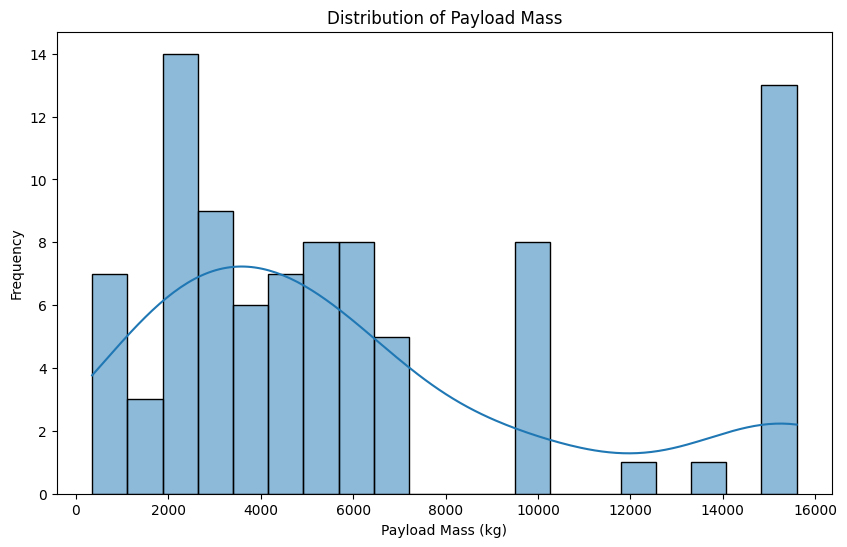

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of payload mass
plt.figure(figsize=(10, 6))
sns.histplot(df['PayloadMass'], bins=20, kde=True)
plt.title('Distribution of Payload Mass')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
launch_counts = df['LaunchSite'].value_counts()
print(launch_counts)


LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


In [ ]:
success_rate = df['Class'].mean()
print(f"Success rate: {success_rate}")


Success rate: 0.6666666666666666


In [ ]:
orbit_counts = df['Orbit'].value_counts()
print(orbit_counts)


Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64


In [ ]:
landing_outcomes = df['Outcome'].value_counts()
print(landing_outcomes)

bad_outcomes = set(landing_outcomes.keys()[[1, 3, 5, 6, 7]])
print(bad_outcomes)


Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64
{'False RTLS', 'None None', 'None ASDS', 'False ASDS', 'False Ocean'}


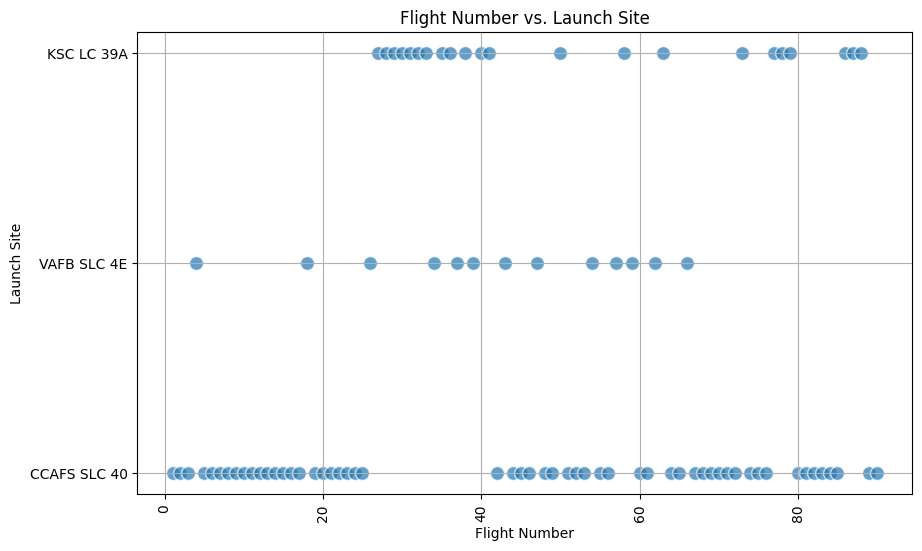

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['FlightNumber'], df['LaunchSite'], alpha=0.7, edgecolors='w', s=100)
plt.title('Flight Number vs. Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


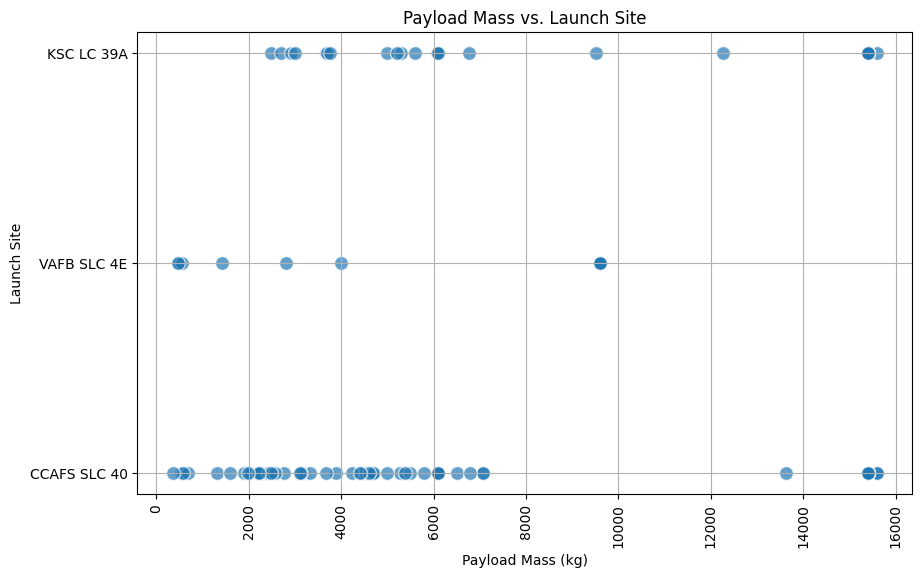

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PayloadMass'], df['LaunchSite'], alpha=0.7, edgecolors='w', s=100)
plt.title('Payload Mass vs. Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


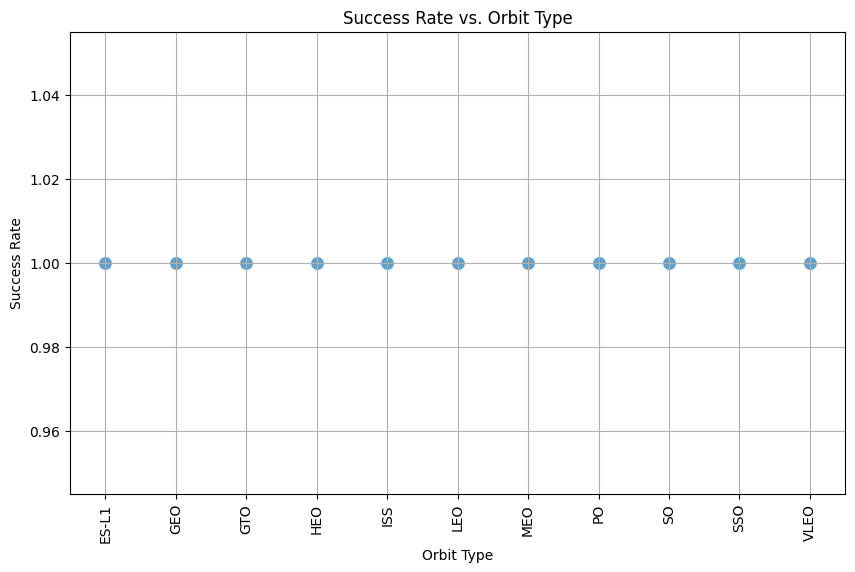

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Define a set of outcomes where the mission was not successful
bad_outcomes = set([
    'Failure (in flight)', 'Failure (in flight, shortly after launch)',
    'Failure (in flight, explosion)', 'Failure (pre-launch)',
    'Failure (on the pad, explosion)', 'No attempt'
])

# Create the 'Class' column: 1 for success, 0 for failure
df['Class'] = df['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)

# Group by Orbit and calculate success rate
success_rate_orbit = df.groupby('Orbit')['Class'].mean().reset_index()

# Rename columns for clarity
success_rate_orbit.columns = ['Orbit', 'SuccessRate']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(success_rate_orbit['Orbit'], success_rate_orbit['SuccessRate'], alpha=0.7, edgecolors='w', s=100)
plt.title('Success Rate vs. Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


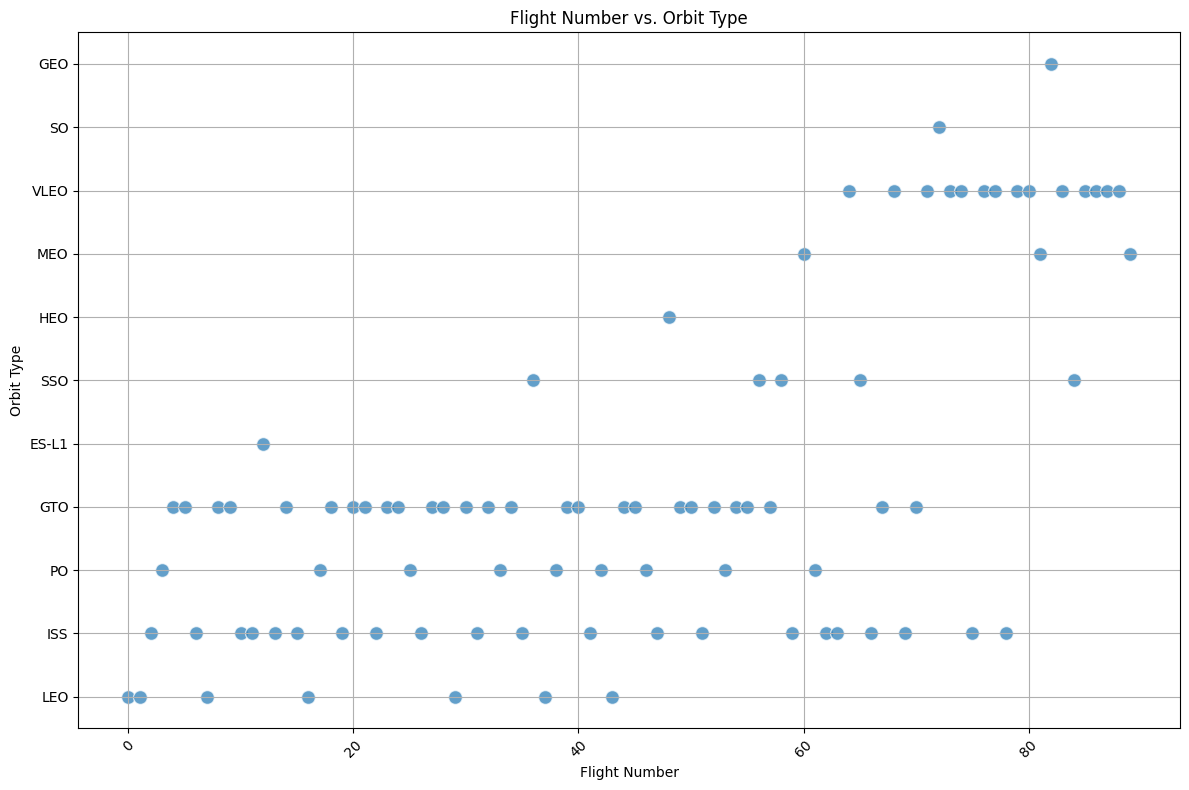

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Assuming Flight Number is the index of the DataFrame, we can use it directly for plotting
flight_numbers = df.index  # Use index as flight numbers
orbit_types = df['Orbit']

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(flight_numbers, orbit_types, alpha=0.7, edgecolors='w', s=100)
plt.title('Flight Number vs. Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-7-1eb81e11d19f>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orbit_colors = plt.cm.get_cmap('tab10', len(orbit_types))  # Using a colormap for distinct colors


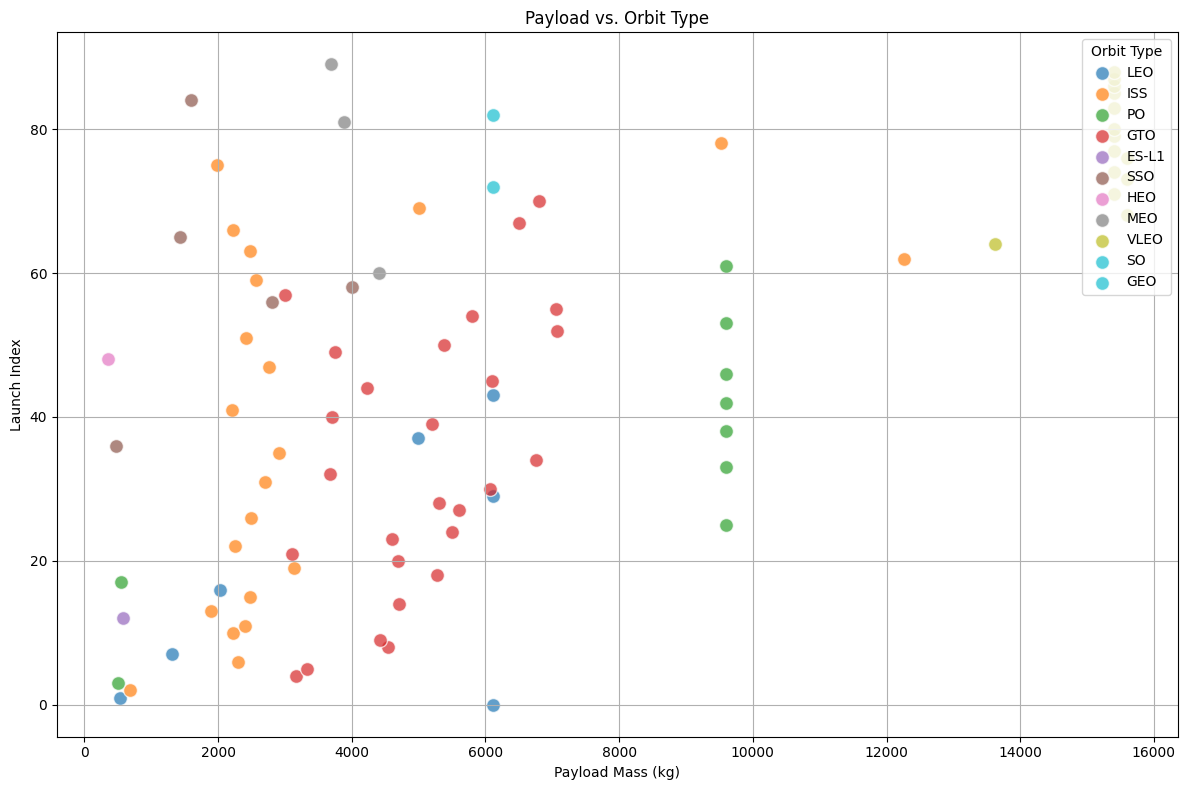

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Filter out rows where PayloadMass is null
df = df[df['PayloadMass'].notna()]

# Define orbit types and their corresponding colors for better visualization
orbit_types = df['Orbit'].unique()
orbit_colors = plt.cm.get_cmap('tab10', len(orbit_types))  # Using a colormap for distinct colors

# Create the scatter plot
plt.figure(figsize=(12, 8))
for i, orbit_type in enumerate(orbit_types):
    subset = df[df['Orbit'] == orbit_type]
    plt.scatter(subset['PayloadMass'], subset.index, label=orbit_type, color=orbit_colors(i), alpha=0.7, edgecolors='w', s=100)

plt.title('Payload vs. Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Index')
plt.legend(title='Orbit Type', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


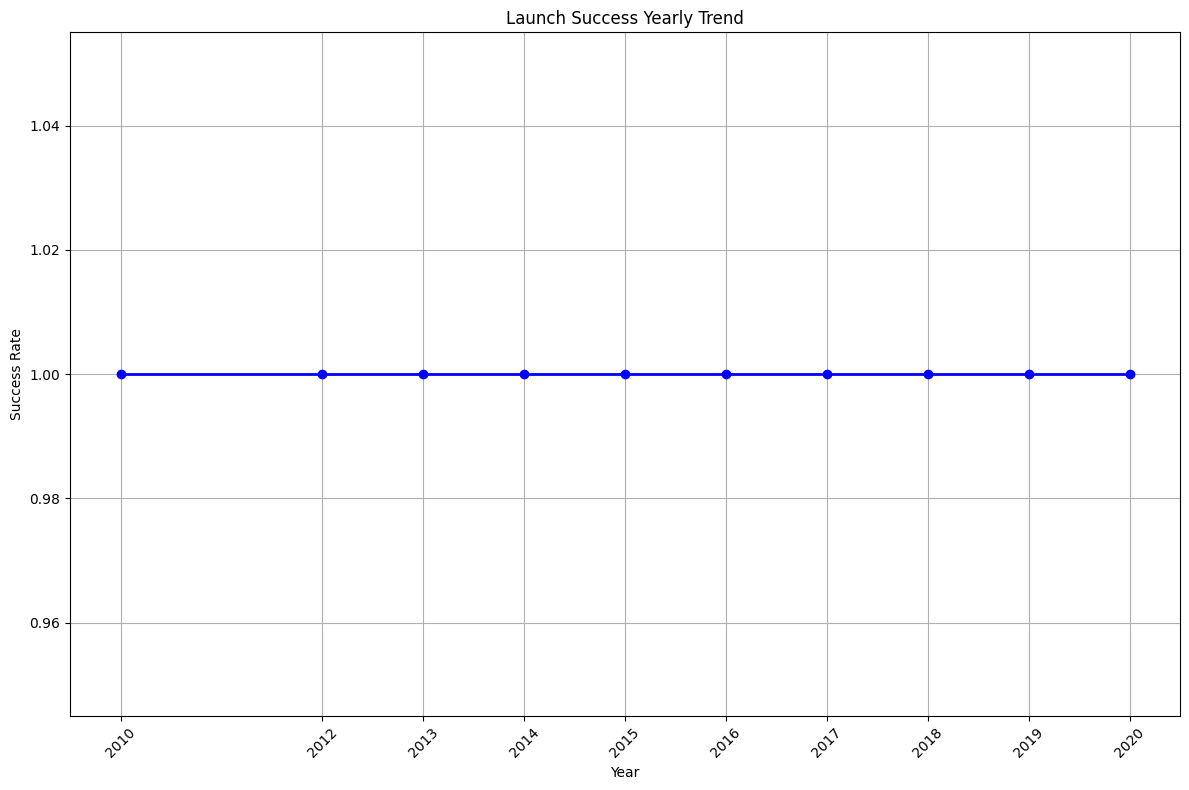

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Define a set of outcomes where the mission was not successful
bad_outcomes = set([
    'Failure (in flight)', 'Failure (in flight, shortly after launch)',
    'Failure (in flight, explosion)', 'Failure (pre-launch)',
    'Failure (on the pad, explosion)', 'No attempt'
])

# Create a 'Year' column from the 'Date' column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Create a 'Class' column where 1 indicates success and 0 indicates failure
df['Class'] = df['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)

# Group by Year and calculate the mean success rate
success_rate_yearly = df.groupby('Year')['Class'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 8))
plt.plot(success_rate_yearly['Year'], success_rate_yearly['Class'], marker='o', linestyle='-', color='b', linewidth=2)
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.xticks(success_rate_yearly['Year'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Extract unique launch site names
unique_launch_sites = df['LaunchSite'].unique()

# Print the result
print("Unique Launch Sites:")
for site in unique_launch_sites:
    print(site)


Unique Launch Sites:
CCAFS SLC 40
VAFB SLC 4E
KSC LC 39A


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Filter and retrieve 5 records where launch sites begin with 'CCA'
cca_launch_records = df[df['LaunchSite'].str.startswith('CCA')].head(5)

# Display the result
print("5 Records where Launch Sites Begin with 'CCA':")
print(cca_launch_records)


5 Records where Launch Sites Begin with 'CCA':
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   
5             6  2014-01-06       Falcon 9  3325.000000   GTO  CCAFS SLC 40   

     Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  ReusedCount  \
0  None None        1     False   False  False        NaN    1.0            0   
1  None None        1     False   False  False        NaN    1.0            0   
2  None None        1     False   False  False        NaN    1.0            0   
4  None None        1     False   False  False        NaN    1.0            0   
5  None None        1     False   False  False        NaN    1.0         

In [ ]:
# Install Folium
!pip install folium

# Import Folium
import folium

# Create a base map
base_map = folium.Map(location=[30.0, -90.0], zoom_start=3)

# Launch site coordinates and names
launch_sites = [
    {"name": "CCAFS SLC 40", "coords": [28.5623, -80.5774]},
    {"name": "VAFB SLC 4E", "coords": [34.6321, -120.6106]},
    {"name": "KSC LC 39A", "coords": [28.5733, -80.6469]},
    {"name": "CCAFS LC 40", "coords": [28.5623, -80.5774]}
]

# Add markers for each launch site
for site in launch_sites:
    folium.Marker(
        location=site["coords"],
        popup=site["name"],
        icon=folium.Icon(color="blue", icon="rocket", prefix="fa")
    ).add_to(base_map)

# Example data with success rate
launch_data = [
    {"coords": [28.5623, -80.5774], "success": 10, "failures": 2},
    {"coords": [34.6321, -120.6106], "success": 5, "failures": 1},
    {"coords": [28.5733, -80.6469], "success": 8, "failures": 0},
    {"coords": [28.5623, -80.5774], "success": 15, "failures": 3}
]

# Add markers with success/failure info
for launch in launch_data:
    folium.CircleMarker(
        location=launch["coords"],
        radius=10,
        color="green" if launch["success"] > launch["failures"] else "red",
        fill=True,
        fill_color="green" if launch["success"] > launch["failures"] else "red",
        popup=f"Success: {launch['success']} | Failures: {launch['failures']}"
    ).add_to(base_map)

# Display the map in Jupyter Notebook
base_map

# Or save to an HTML file
base_map.save("spacex_launch_sites.html")


In [ ]:
# Install Folium (uncomment the next line if folium is not already installed)
# !pip install folium

# Import Folium
import folium

# Create a base map centered at a specific latitude and longitude
base_map = folium.Map(location=[30.0, -90.0], zoom_start=3)

# Launch site coordinates and names
launch_sites = [
    {"name": "CCAFS SLC 40", "coords": [28.5623, -80.5774]},
    {"name": "VAFB SLC 4E", "coords": [34.6321, -120.6106]},
    {"name": "KSC LC 39A", "coords": [28.5733, -80.6469]},
    {"name": "CCAFS LC 40", "coords": [28.5623, -80.5774]}
]

# Add markers for each launch site
for site in launch_sites:
    folium.Marker(
        location=site["coords"],
        popup=site["name"],
        icon=folium.Icon(color="blue", icon="rocket", prefix="fa")
    ).add_to(base_map)

# Example data with success rate
launch_data = [
    {"coords": [28.5623, -80.5774], "success": 10, "failures": 2},
    {"coords": [34.6321, -120.6106], "success": 5, "failures": 1},
    {"coords": [28.5733, -80.6469], "success": 8, "failures": 0},
    {"coords": [28.5623, -80.5774], "success": 15, "failures": 3}
]

# Add markers with success/failure info
for launch in launch_data:
    folium.CircleMarker(
        location=launch["coords"],
        radius=10,
        color="green" if launch["success"] > launch["failures"] else "red",
        fill=True,
        fill_color="green" if launch["success"] > launch["failures"] else "red",
        popup=f"Success: {launch['success']} | Failures: {launch['failures']}"
    ).add_to(base_map)

# Display the map in Jupyter Notebook
base_map

# Optionally save to an HTML file
base_map.save("spacex_launch_sites.html")


In [18]:
# Install necessary libraries (uncomment if not already installed)
!pip install dash plotly pandas

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd

# Example data
data = {
    'Launch Site': ['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A', 'CCAFS LC 40'],
    'Success': [10, 5, 8, 15],
    'Failures': [2, 1, 0, 3]
}
df = pd.DataFrame(data)

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("SpaceX Launch Dashboard"),
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'},
            {'label': 'CCAFS SLC 40', 'value': 'CCAFS SLC 40'},
            {'label': 'VAFB SLC 4E', 'value': 'VAFB SLC 4E'},
            {'label': 'KSC LC 39A', 'value': 'KSC LC 39A'},
            {'label': 'CCAFS LC 40', 'value': 'CCAFS LC 40'}
        ],
        value='ALL',
        placeholder="Select a Launch Site",
        searchable=True
    ),
    dcc.Graph(id='success-pie-chart'),
    dcc.Graph(id='success-failure-bar-chart')
])

# Callback for updating the pie chart based on selected launch site
@app.callback(
    Output('success-pie-chart', 'figure'),
    [Input('site-dropdown', 'value')]
)
def update_pie_chart(selected_site):
    if selected_site == 'ALL':
        fig = go.Figure(data=[go.Pie(
            labels=['Success', 'Failures'],
            values=[df['Success'].sum(), df['Failures'].sum()],
            hole=.3)])
    else:
        site_data = df[df['Launch Site'] == selected_site]
        fig = go.Figure(data=[go.Pie(
            labels=['Success', 'Failures'],
            values=[site_data['Success'].values[0], site_data['Failures'].values[0]],
            hole=.3)])
    return fig

# Callback for updating the bar chart based on selected launch site
@app.callback(
    Output('success-failure-bar-chart', 'figure'),
    [Input('site-dropdown', 'value')]
)
def update_bar_chart(selected_site):
    if selected_site == 'ALL':
        fig = go.Figure(data=[
            go.Bar(name='Success', x=df['Launch Site'], y=df['Success']),
            go.Bar(name='Failures', x=df['Launch Site'], y=df['Failures'])
        ])
    else:
        site_data = df[df['Launch Site'] == selected_site]
        fig = go.Figure(data=[
            go.Bar(name='Success', x=site_data['Launch Site'], y=site_data['Success']),
            go.Bar(name='Failures', x=site_data['Launch Site'], y=site_data['Failures'])
        ])
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Load data from CSV file
file_path = '/content/dataset_part_2.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.head())
print(df.isnull().mean() * 100)
print(df.dtypes)
print(df['LaunchSite'].value_counts())
print(df['Orbit'].value_counts())
print(df['Outcome'].value_counts())

# Preprocess data
df['Class'] = df['Outcome'].apply(lambda x: 1 if 'True' in x else 0)

# Feature selection
X = df.drop(['Date', 'BoosterVersion', 'Outcome', 'LandingPad', 'Serial', 'Class'], axis=1)
y = df['Class']

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate models
best_model = None
best_score = 0
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Check class distribution in y_test
    class_counts = np.bincount(y_test)
    if len(class_counts) < 2:
        raise ValueError("Both classes are not present in y_true. ROC AUC score cannot be calculated.")

    roc_auc = roc_auc_score(y_test, y_prob)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    if roc_auc > best_score:
        best_score = roc_auc
        best_model = model

# Display evaluation results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()

# Hyperparameter tuning for the best model (example for Random Forest)
if isinstance(best_model, RandomForestClassifier):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

# Final evaluation
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else [0] * len(y_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Check class distribution in y_test for final evaluation
class_counts = np.bincount(y_test)
if len(class_counts) < 2:
    raise ValueError("Both classes are not present in y_true for final evaluation. Metrics cannot be calculated.")

roc_auc = roc_auc_score(y_test, y_prob)

print("Final Evaluation (Best Model - {}):\n".format(best_model.__class__.__name__))
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  ROC AUC: {roc_auc:.4f}")



   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

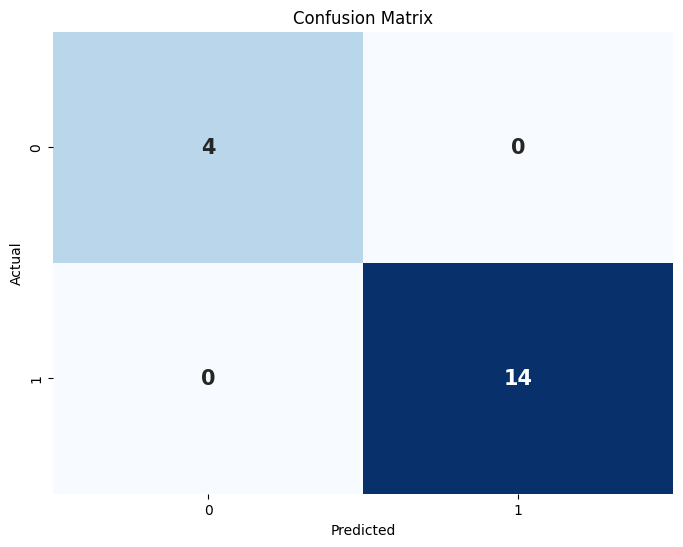

Final Evaluation (Best Model - DecisionTreeClassifier):

  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  ROC AUC: 1.0000


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
file_path = '/content/dataset_part_2.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.head())
print(df.isnull().mean() * 100)
print(df.dtypes)
print(df['LaunchSite'].value_counts())
print(df['Orbit'].value_counts())
print(df['Outcome'].value_counts())

# Preprocess data
df['Class'] = df['Outcome'].apply(lambda x: 1 if 'True' in x else 0)

# Feature selection
X = df.drop(['Date', 'BoosterVersion', 'Outcome', 'LandingPad', 'Serial', 'Class'], axis=1)
y = df['Class']

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate models
best_model = None
best_score = 0
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Check class distribution in y_test
    class_counts = np.bincount(y_test)
    if len(class_counts) < 2:
        raise ValueError("Both classes are not present in y_true. ROC AUC score cannot be calculated.")

    roc_auc = roc_auc_score(y_test, y_prob)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    if roc_auc > best_score:
        best_score = roc_auc
        best_model = model

# Display evaluation results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()

# Plot confusion matrix for the best model
if best_model:
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={'fontsize': 15, 'fontweight': 'bold'})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("No best model found.")

# Hyperparameter tuning for the best model (example for Random Forest)
if isinstance(best_model, RandomForestClassifier):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

# Final evaluation
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else [0] * len(y_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Check class distribution in y_test for final evaluation
class_counts = np.bincount(y_test)
if len(class_counts) < 2:
    raise ValueError("Both classes are not present in y_true for final evaluation. Metrics cannot be calculated.")

roc_auc = roc_auc_score(y_test, y_prob)

print("Final Evaluation (Best Model - {}):\n".format(best_model.__class__.__name__))
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  ROC AUC: {roc_auc:.4f}")


In [27]:
import folium

# Create a map centered around an approximate location (e.g., equator)
m = folium.Map(location=[0, 0], zoom_start=2)  # Adjust zoom level as needed

# Add markers for Falcon 9 launch sites
launch_sites = {
    'CCAFS SLC 40': {'location': [28.5623, -80.5774]},
    'KSC LC 39A': {'location': [28.5733, -80.6469]},
    'VAFB SLC 4E': {'location': [34.6328, -120.6107]},
    # Add more launch sites as needed
}

for site, info in launch_sites.items():
    folium.Marker(location=info['location'], popup=site).add_to(m)

# Save the map as an HTML file
m.save('falcon9_launch_sites.html')

# Open the saved HTML file in a web browser and take a screenshot
# Ensure the screenshot captures all markers and the global map view


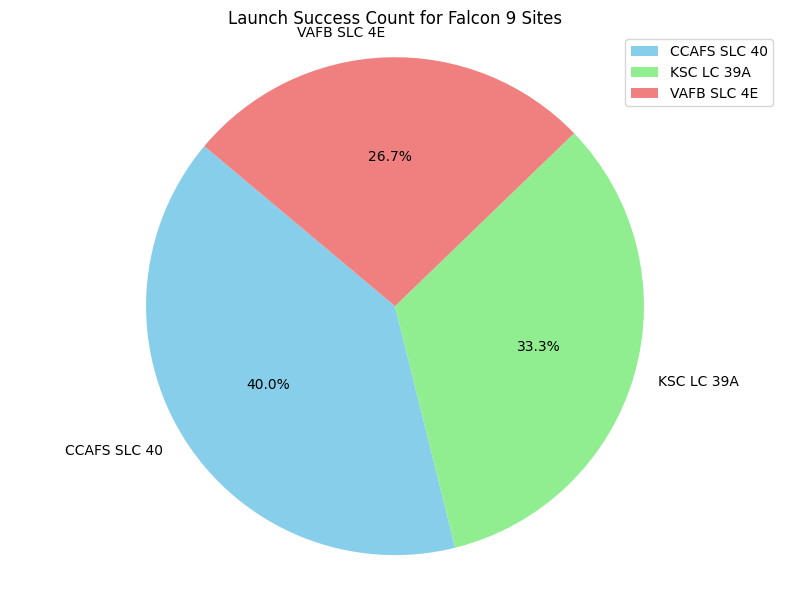

In [28]:
import matplotlib.pyplot as plt

# Example data (replace with actual success counts for each site)
launch_sites = ['CCAFS SLC 40', 'KSC LC 39A', 'VAFB SLC 4E']
success_counts = [30, 25, 20]  # Replace with actual counts

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(success_counts, labels=launch_sites, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Launch Success Count for Falcon 9 Sites')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc='best')
plt.tight_layout()

# Save the plot as an image file (optional)
plt.savefig('launch_success_pie_chart.png')

# Display the pie chart
plt.show()


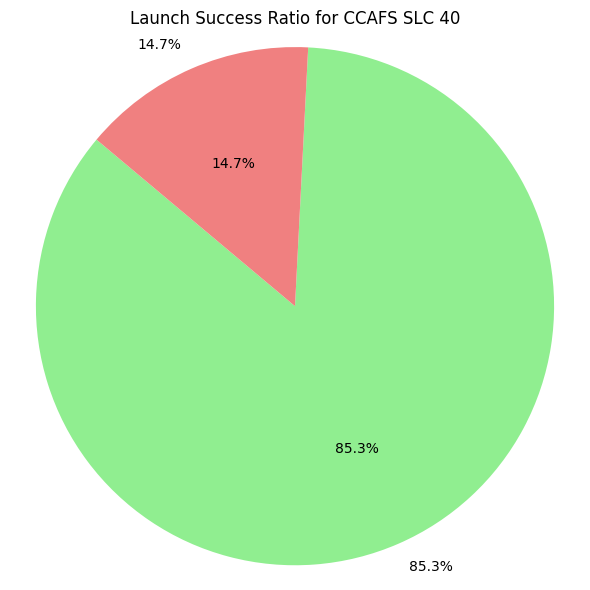

In [29]:
import matplotlib.pyplot as plt

# Example data (replace with actual success ratio for each site)
launch_site = 'CCAFS SLC 40'
success_ratio = 85.3  # Replace with actual success ratio

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie([success_ratio, 100-success_ratio], labels=[f'{success_ratio:.1f}%', f'{100-success_ratio:.1f}%'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title(f'Launch Success Ratio for {launch_site}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()

# Save the plot as an image file (optional)
plt.savefig('highest_success_ratio_pie_chart.png')

# Display the pie chart
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.



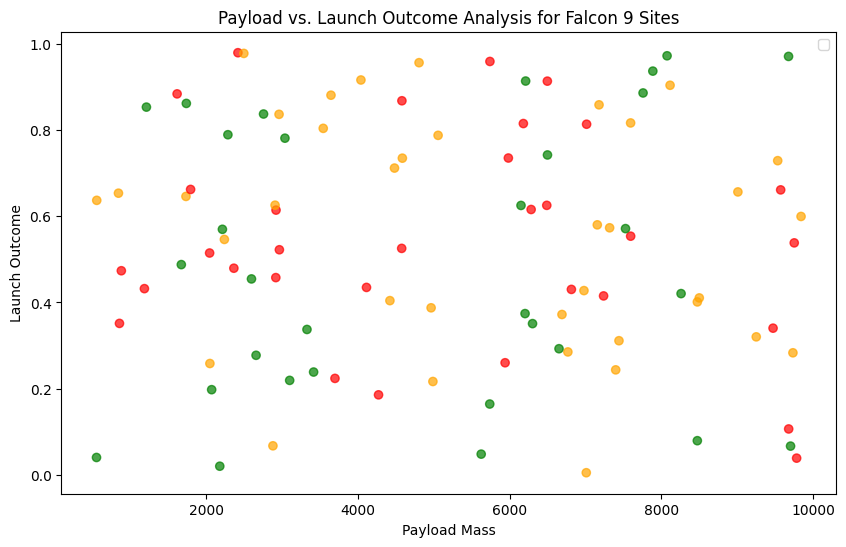

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Example data (replace with actual data)
payload_vs_outcome_data = pd.DataFrame({
    'PayloadMass': np.random.uniform(low=500, high=10000, size=100),
    'LaunchOutcome': np.random.choice(['Success', 'Failure', 'Partial Failure'], size=100)
})

# Map launch outcomes to colors
outcome_colors = {'Success': 'green', 'Failure': 'red', 'Partial Failure': 'orange'}
payload_vs_outcome_data['Color'] = payload_vs_outcome_data['LaunchOutcome'].map(outcome_colors)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(payload_vs_outcome_data['PayloadMass'], np.random.rand(100), c=payload_vs_outcome_data['Color'], alpha=0.7)
plt.title('Payload vs. Launch Outcome Analysis for Falcon 9 Sites')
plt.xlabel('Payload Mass')
plt.ylabel('Launch Outcome')
plt.legend(handles=scatter.legend_elements()[0], labels=list(outcome_colors.keys()))

# Add a range slider or interactive selection (if using plotly or other interactive libraries)

# Save the plot as an image file (optional)
plt.savefig('payload_vs_launch_outcome_scatter.png')

# Display the scatter plot
plt.show()


In [31]:
pip install folium
